## SRFP AQI data analysis and visualization for Mumbai

In [28]:
import sys
sys.path.append('..')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

from functions import dplot, stat_calc, aqi_calc, score_calc

# Use seaborn style defaults and set default figure size
sns.set_style("whitegrid")

In [29]:
dfmod = pd.read_csv('./data/mumbai_mod.csv')
dfobs = pd.read_csv('./data/mumbai_obs.csv')

In [30]:
dfmod.head()

,date,hour,mod_PM2.5,mod_PM2.5_stdev,mod_PM10,mod_PM10_stdev
0,2020-10-31,1:00:00,56.90,10.14,71.60,15.56
1,2020-10-31,2:00:00,48.21,5.90,58.64,9.03
2,2020-10-31,3:00:00,43.90,7.86,53.29,11.40
3,2020-10-31,4:00:00,44.20,10.73,54.01,15.24
4,2020-10-31,5:00:00,45.31,11.88,55.25,16.50


In [31]:
dfobs.head()

,date,hour,obs_PM2.5,obs_PM2.5_stdev,obs_PM10,obs_PM10_stdev
0,2020-10-31,1:00:00,71.03,22.37,147.87,68.32
1,2020-10-31,2:00:00,65.24,23.22,124.96,47.30
2,2020-10-31,3:00:00,58.67,22.38,121.66,51.15
3,2020-10-31,4:00:00,57.91,23.44,115.64,61.33
4,2020-10-31,5:00:00,60.44,18.95,117.62,52.56


In [32]:
dfmod.isna().sum()

date               0
hour               0
mod_PM2.5          0
mod_PM2.5_stdev    0
mod_PM10           0
mod_PM10_stdev     0
dtype: int64

In [33]:
dfobs.isna().sum()

date                0
hour                0
obs_PM2.5          83
obs_PM2.5_stdev    83
obs_PM10           82
obs_PM10_stdev     82
dtype: int64

In [34]:
dfmod['datetime'] = pd.to_datetime(dfmod.date) + pd.to_timedelta(dfmod.hour)
dfobs['datetime'] = pd.to_datetime(dfobs.date) + pd.to_timedelta(dfobs.hour)

dfmod = dfmod.set_index(dfmod.datetime)
dfobs = dfobs.set_index(dfobs.datetime)

dfmod = dfmod.drop(['date', 'hour'], axis=1)
dfobs = dfobs.drop(['date', 'hour'], axis=1)

In [35]:
dfobs.head()

,obs_PM2.5,obs_PM2.5_stdev,obs_PM10,obs_PM10_stdev,datetime
datetime,,,,,
2020-10-31 01:00:00,71.03,22.37,147.87,68.32,2020-10-31 01:00:00
2020-10-31 02:00:00,65.24,23.22,124.96,47.30,2020-10-31 02:00:00
2020-10-31 03:00:00,58.67,22.38,121.66,51.15,2020-10-31 03:00:00
2020-10-31 04:00:00,57.91,23.44,115.64,61.33,2020-10-31 04:00:00
2020-10-31 05:00:00,60.44,18.95,117.62,52.56,2020-10-31 05:00:00


In [36]:
dfobs = dfobs.interpolate(method='time')

In [37]:
dfobs.isna().sum()

obs_PM2.5          0
obs_PM2.5_stdev    0
obs_PM10           0
obs_PM10_stdev     0
datetime           0
dtype: int64

### Plot of time series with error bars

In [38]:
# Removing the october readings temporarily

dfmod = dfmod.iloc[23:, :]
dfobs = dfobs.iloc[23:, :]

In [39]:
dfmod.head()

,mod_PM2.5,mod_PM2.5_stdev,mod_PM10,mod_PM10_stdev,datetime
datetime,,,,,
2020-11-01 00:00:00,90.47,12.94,110.01,20.03,2020-11-01 00:00:00
2020-11-01 01:00:00,84.59,9.50,101.22,14.04,2020-11-01 01:00:00
2020-11-01 02:00:00,78.17,7.58,92.52,10.89,2020-11-01 02:00:00
2020-11-01 03:00:00,72.33,6.81,84.75,9.83,2020-11-01 03:00:00
2020-11-01 04:00:00,75.97,12.24,89.88,17.43,2020-11-01 04:00:00


In [40]:
# Extracting the different values for the months

dfmod['month'] = dfmod.index.month
dfobs['month'] = dfobs.index.month

splits1 = dfmod.groupby('month')
splits2 = dfobs.groupby('month')

dfmod_jan = list(splits1)[0][1]
dfmod_nov = list(splits1)[1][1]
dfmod_dec = list(splits1)[2][1]

dfobs_jan = list(splits2)[0][1]
dfobs_nov = list(splits2)[1][1]
dfobs_dec = list(splits2)[2][1]

dfmod_jan

,mod_PM2.5,mod_PM2.5_stdev,mod_PM10,mod_PM10_stdev,datetime,month
datetime,,,,,,
2021-01-01 00:00:00,125.32,43.22,189.59,68.02,2021-01-01 00:00:00,1
2021-01-01 01:00:00,102.16,25.82,153.03,39.69,2021-01-01 01:00:00,1
2021-01-01 02:00:00,103.65,19.29,155.65,29.39,2021-01-01 02:00:00,1
2021-01-01 03:00:00,118.47,19.21,179.32,29.36,2021-01-01 03:00:00,1
2021-01-01 04:00:00,130.32,13.10,196.29,19.33,2021-01-01 04:00:00,1
...,...,...,...,...,...,...
2021-01-31 19:00:00,175.85,37.38,233.45,59.61,2021-01-31 19:00:00,1
2021-01-31 20:00:00,183.79,42.67,244.58,67.81,2021-01-31 20:00:00,1
2021-01-31 21:00:00,185.09,43.60,244.86,69.48,2021-01-31 21:00:00,1


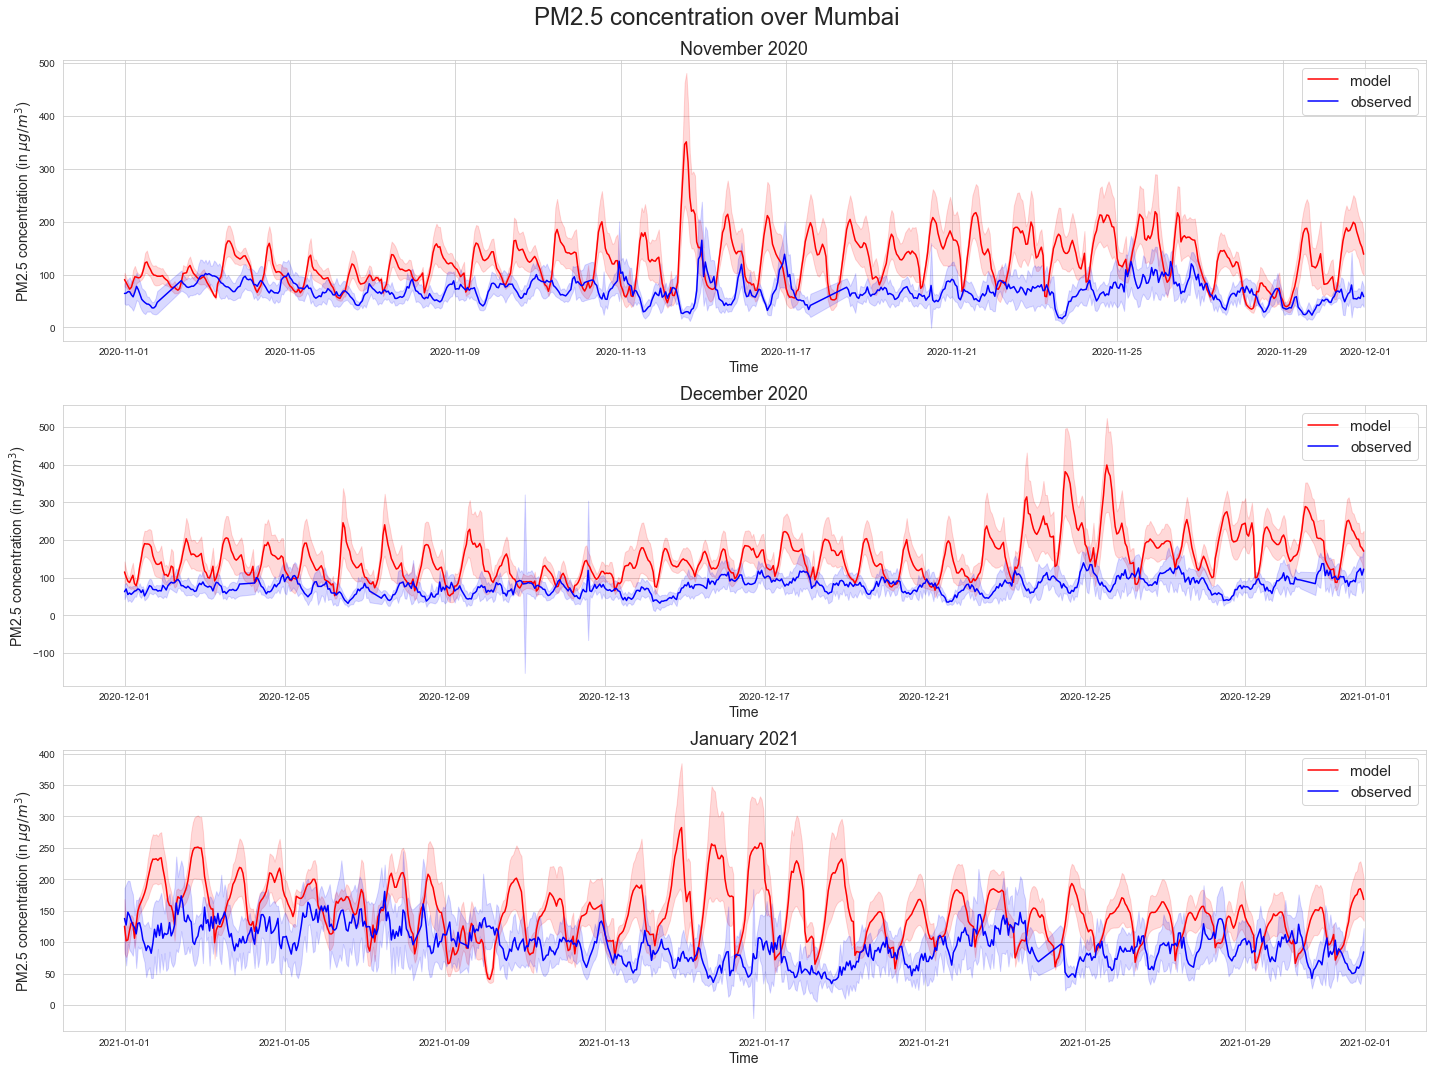

In [41]:
# Plot of PM2.5 model and data for Nov, Dec and Jan with errorbars

fig = plt.figure(figsize=(20,15))
plt.subplot(311)
sns.lineplot(data = dfmod_nov, x='datetime', y='mod_PM2.5', err_style='band', label='model', color='red')
# plt.errorbar(dfmod_nov.index, dfmod_nov['mod_PM2.5'], yerr=dfmod_nov['mod_PM2.5_stdev'], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfmod_nov.index, dfmod_nov['mod_PM2.5'] + dfmod_nov['mod_PM2.5_stdev'], dfmod_nov['mod_PM2.5'] - dfmod_nov['mod_PM2.5_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfobs_nov, x='datetime', y='obs_PM2.5', err_style='band', label='observed', color='blue')
# plt.errorbar(dfobs_nov.index, dfobs_nov['obs_PM2.5'], yerr=dfobs_nov['obs_PM2.5_stdev'], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfobs_nov.index, dfobs_nov['obs_PM2.5'] + dfobs_nov['obs_PM2.5_stdev'], dfobs_nov['obs_PM2.5'] - dfobs_nov['obs_PM2.5_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM2.5 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('November 2020', fontsize=18)

plt.subplot(312)
sns.lineplot(data = dfmod_dec, x='datetime', y='mod_PM2.5', err_style='band', label='model', color='red')
# plt.errorbar(dfmod_dec.index, dfmod_dec['mod_PM2.5'], yerr=dfmod_dec['mod_PM2.5_stdev'], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfmod_dec.index, dfmod_dec['mod_PM2.5'] + dfmod_dec['mod_PM2.5_stdev'], dfmod_dec['mod_PM2.5'] - dfmod_dec['mod_PM2.5_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfobs_dec, x='datetime', y='obs_PM2.5', err_style='band', label='observed', color='blue')
# plt.errorbar(dfobs_dec.index, dfobs_dec['obs_PM2.5'], yerr=dfobs_dec['obs_PM2.5_stdev'], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfobs_dec.index, dfobs_dec['obs_PM2.5'] + dfobs_dec['obs_PM2.5_stdev'], dfobs_dec['obs_PM2.5'] - dfobs_dec['obs_PM2.5_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM2.5 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('December 2020', fontsize=18)

plt.subplot(313)
sns.lineplot(data = dfmod_jan, x='datetime', y='mod_PM2.5', err_style='band', label='model', color='red')
# plt.errorbar(dfmod_jan.index, dfmod_jan['mod_PM2.5'], yerr=dfmod_jan['mod_PM2.5_stdev'], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfmod_jan.index, dfmod_jan['mod_PM2.5'] + dfmod_jan['mod_PM2.5_stdev'], dfmod_jan['mod_PM2.5'] - dfmod_jan['mod_PM2.5_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfobs_jan, x='datetime', y='obs_PM2.5', err_style='band', label='observed', color='blue')
# plt.errorbar(dfobs_jan.index, dfobs_jan['obs_PM2.5'], yerr=dfobs_jan['obs_PM2.5_stdev'], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfobs_jan.index, dfobs_jan['obs_PM2.5'] + dfobs_jan['obs_PM2.5_stdev'], dfobs_jan['obs_PM2.5'] - dfobs_jan['obs_PM2.5_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM2.5 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('January 2021', fontsize=18)

fig.suptitle('PM2.5 concentration over Mumbai', fontsize=24, y=0.99)
fig.tight_layout()
plt.savefig('./images/pm25ts_err.png')

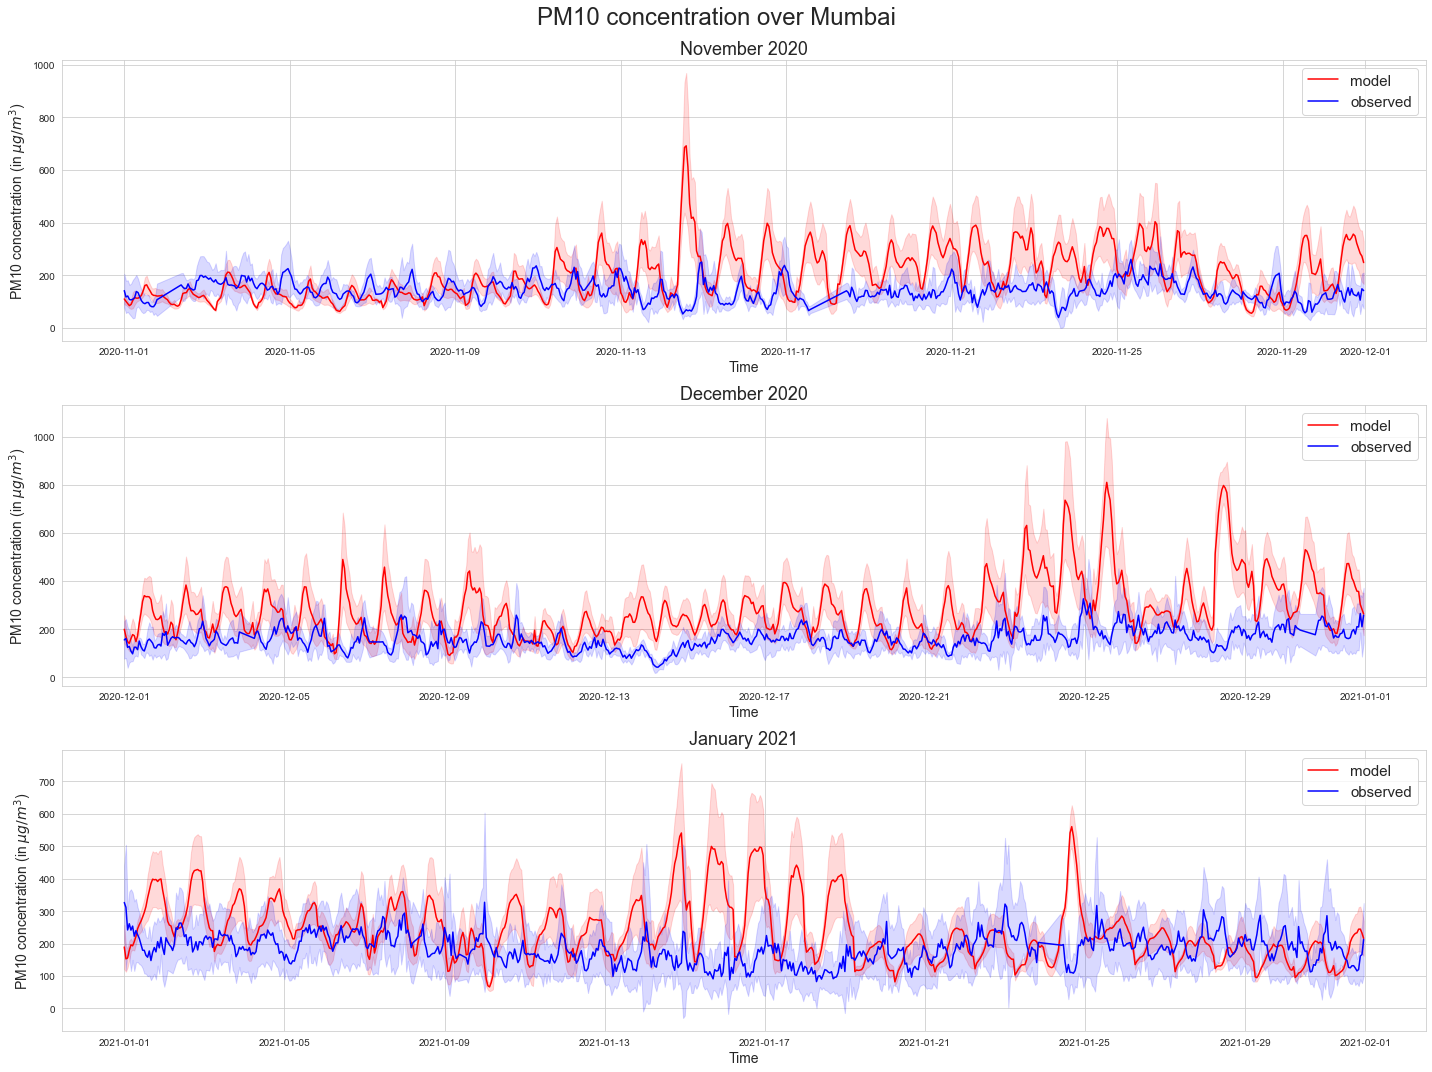

In [42]:
# Plot of PM10 model and data for Nov, Dec and Jan with errorbars

fig = plt.figure(figsize=(20,15))
plt.subplot(311)
sns.lineplot(data = dfmod_nov, x='datetime', y='mod_PM10', err_style='band', label='model', color='red')
# plt.errorbar(dfmod_nov.index, dfmod_nov['mod_PM10'], yerr=dfmod_nov['mod_PM10_stdev '], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfmod_nov.index, dfmod_nov['mod_PM10'] + dfmod_nov['mod_PM10_stdev'], dfmod_nov['mod_PM10'] - dfmod_nov['mod_PM10_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfobs_nov, x='datetime', y='obs_PM10', err_style='band', label='observed', color='blue')
# plt.errorbar(dfobs_nov.index, dfobs_nov['obs_PM10'], yerr=dfobs_nov['obs_PM10_stdev '], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfobs_nov.index, dfobs_nov['obs_PM10'] + dfobs_nov['obs_PM10_stdev'], dfobs_nov['obs_PM10'] - dfobs_nov['obs_PM10_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM10 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('November 2020', fontsize=18)

plt.subplot(312)
sns.lineplot(data = dfmod_dec, x='datetime', y='mod_PM10', err_style='band', label='model', color='red')
# plt.errorbar(dfmod_nov.index, dfmod_nov['mod_PM10'], yerr=dfmod_nov['mod_PM10_stdev '], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfmod_dec.index, dfmod_dec['mod_PM10'] + dfmod_dec['mod_PM10_stdev'], dfmod_dec['mod_PM10'] - dfmod_dec['mod_PM10_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfobs_dec, x='datetime', y='obs_PM10', err_style='band', label='observed', color='blue')
# plt.errorbar(dfobs_nov.index, dfobs_nov['obs_PM10'], yerr=dfobs_nov['obs_PM10_stdev '], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfobs_dec.index, dfobs_dec['obs_PM10'] + dfobs_dec['obs_PM10_stdev'], dfobs_dec['obs_PM10'] - dfobs_dec['obs_PM10_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM10 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('December 2020', fontsize=18)

plt.subplot(313)
sns.lineplot(data = dfmod_jan, x='datetime', y='mod_PM10', err_style='band', label='model', color='red')
# plt.errorbar(dfmod_nov.index, dfmod_nov['mod_PM10'], yerr=dfmod_nov['mod_PM10_stdev '], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfmod_jan.index, dfmod_jan['mod_PM10'] + dfmod_jan['mod_PM10_stdev'], dfmod_jan['mod_PM10'] - dfmod_jan['mod_PM10_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfobs_jan, x='datetime', y='obs_PM10', err_style='band', label='observed', color='blue')
# plt.errorbar(dfobs_nov.index, dfobs_nov['obs_PM10'], yerr=dfobs_nov['obs_PM10_stdev '], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfobs_jan.index, dfobs_jan['obs_PM10'] + dfobs_jan['obs_PM10_stdev'], dfobs_jan['obs_PM10'] - dfobs_jan['obs_PM10_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM10 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('January 2021', fontsize=18)

fig.suptitle('PM10 concentration over Mumbai', fontsize=24, y=0.99)
fig.tight_layout()
plt.savefig('./images/pm10ts_err.png')

### Plot of diurnal variation

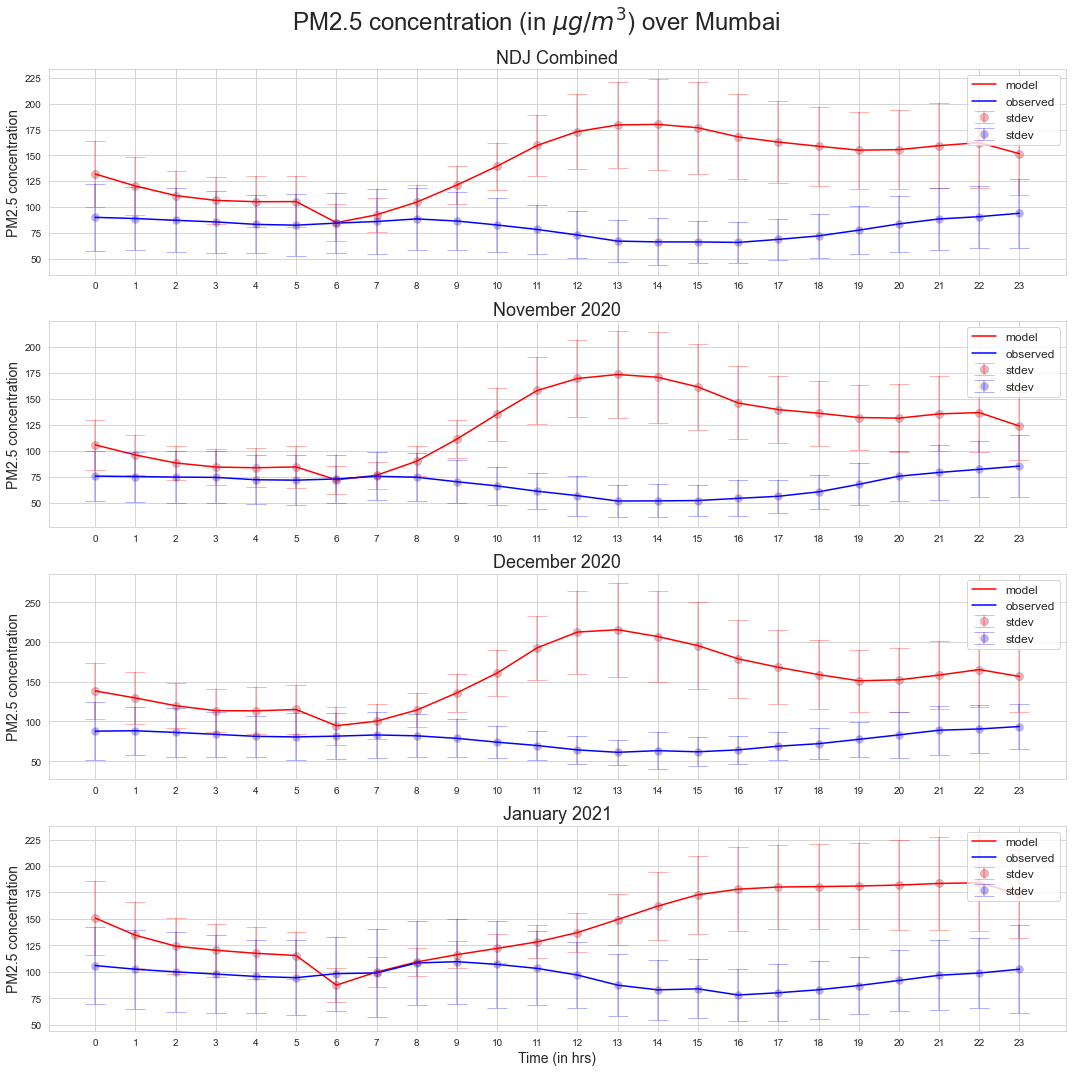

In [43]:
fig = plt.figure(figsize=(15,15))

plt.subplot(411)
dplot.plot(dfmod, dfobs, 'mod_PM2.5', 'obs_PM2.5', mod_stdev='mod_PM2.5_stdev', obs_stdev='obs_PM2.5_stdev')
plt.ylabel('PM2.5 concentration', fontsize=14)
# plt.xlabel('Time (in hrs)', fontsize=14)
plt.title('NDJ Combined', fontsize=18)

plt.subplot(412)
dplot.plot(dfmod_nov, dfobs_nov, 'mod_PM2.5', 'obs_PM2.5', mod_stdev='mod_PM2.5_stdev', obs_stdev='obs_PM2.5_stdev')
plt.ylabel('PM2.5 concentration', fontsize=14)
# plt.xlabel('Time (in hrs)', fontsize=14)
plt.title('November 2020', fontsize=18)

plt.subplot(413)
dplot.plot(dfmod_dec, dfobs_dec, 'mod_PM2.5', 'obs_PM2.5', mod_stdev='mod_PM2.5_stdev', obs_stdev='obs_PM2.5_stdev')
plt.ylabel('PM2.5 concentration', fontsize=14)
# plt.xlabel('Time (in hrs)', fontsize=14)
plt.title('December 2020', fontsize=18)

plt.subplot(414)
dplot.plot(dfmod_jan, dfobs_jan, 'mod_PM2.5', 'obs_PM2.5', mod_stdev='mod_PM2.5_stdev', obs_stdev='obs_PM2.5_stdev')
plt.ylabel('PM2.5 concentration', fontsize=14)
plt.xlabel('Time (in hrs)', fontsize=14)
plt.title('January 2021', fontsize=18)

fig.suptitle('PM2.5 concentration (in $\mu g/m^3$) over Mumbai', fontsize=24, y=0.99)
fig.tight_layout()
plt.savefig('./images/diurnal_pm25.png')

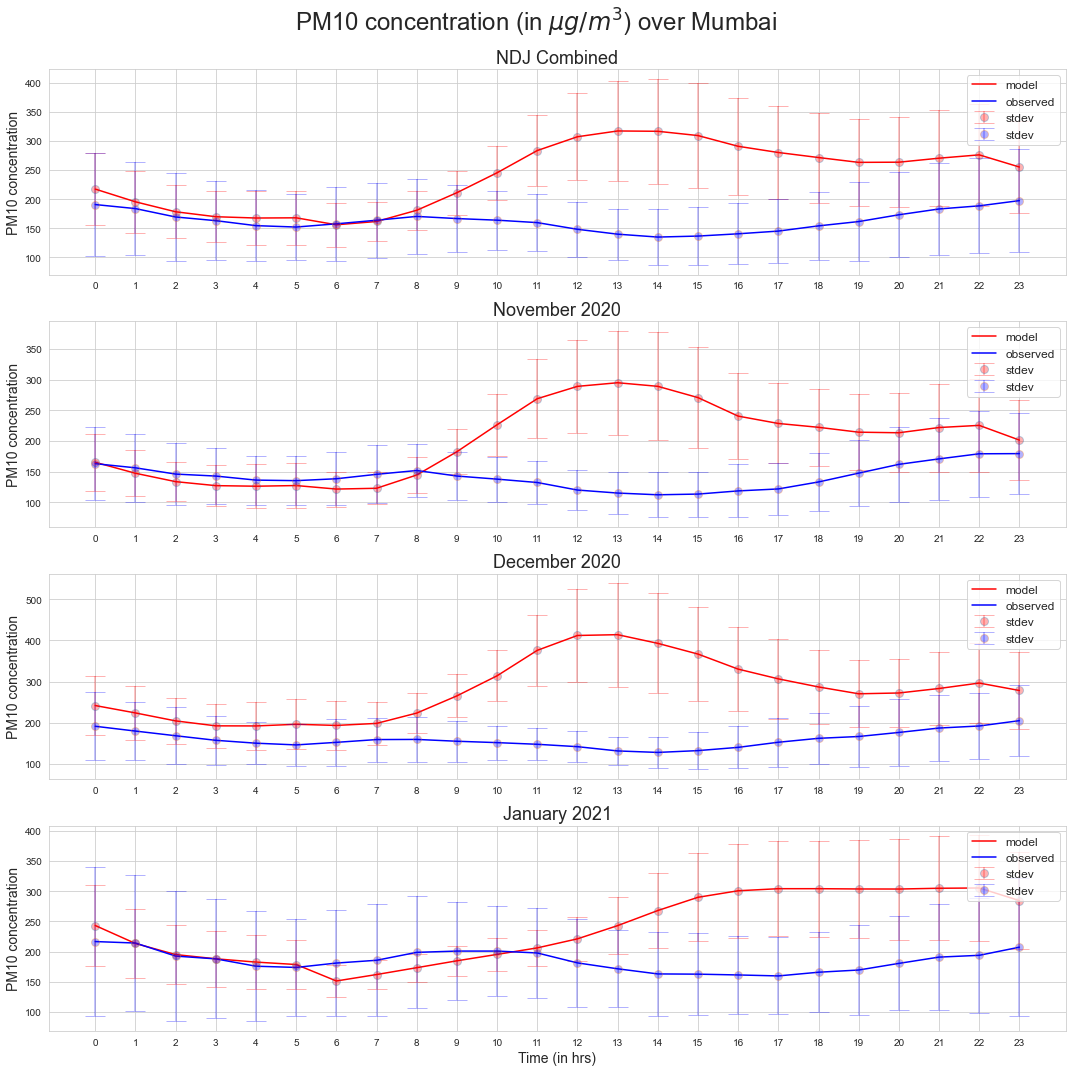

In [44]:
fig = plt.figure(figsize=(15,15))

plt.subplot(411)
dplot.plot(dfmod, dfobs, 'mod_PM10', 'obs_PM10', mod_stdev='mod_PM10_stdev', obs_stdev='obs_PM10_stdev')
plt.ylabel('PM10 concentration', fontsize=14)
# plt.xlabel('Time (in hrs)', fontsize=14)
plt.title('NDJ Combined', fontsize=18)

plt.subplot(412)
dplot.plot(dfmod_nov, dfobs_nov, 'mod_PM10', 'obs_PM10', mod_stdev='mod_PM10_stdev', obs_stdev='obs_PM10_stdev')
plt.ylabel('PM10 concentration', fontsize=14)
# plt.xlabel('Time (in hrs)', fontsize=14)
plt.title('November 2020', fontsize=18)

plt.subplot(413)
dplot.plot(dfmod_dec, dfobs_dec, 'mod_PM10', 'obs_PM10', mod_stdev='mod_PM10_stdev', obs_stdev='obs_PM10_stdev')
plt.ylabel('PM10 concentration', fontsize=14)
# plt.xlabel('Time (in hrs)', fontsize=14)
plt.title('December 2020', fontsize=18)

plt.subplot(414)
dplot.plot(dfmod_jan, dfobs_jan, 'mod_PM10', 'obs_PM10', mod_stdev='mod_PM10_stdev', obs_stdev='obs_PM10_stdev')
plt.ylabel('PM10 concentration', fontsize=14)
plt.xlabel('Time (in hrs)', fontsize=14)
plt.title('January 2021', fontsize=18)

fig.suptitle('PM10 concentration (in $\mu g/m^3$) over Mumbai', fontsize=24, y=0.99)
fig.tight_layout()
plt.savefig('./images/diurnal_pm10.png')

### Take the running average for the data

In [45]:
# redifing the dataframes

dfmod = pd.read_csv('data/mumbai_mod.csv')
dfobs = pd.read_csv('data/mumbai_obs.csv')

In [46]:
dfmod['datetime'] = pd.to_datetime(dfmod.date) + pd.to_timedelta(dfmod.hour)
dfobs['datetime'] = pd.to_datetime(dfobs.date) + pd.to_timedelta(dfobs.hour)

dfmod = dfmod.set_index(dfmod.datetime)
dfobs = dfobs.set_index(dfobs.datetime)

dfmod = dfmod.drop(['date', 'hour'], axis=1)
dfobs = dfobs.drop(['date', 'hour'], axis=1)

In [47]:
dfobs = dfobs.interpolate(method='time')

dfobs.isna().sum()

obs_PM2.5          0
obs_PM2.5_stdev    0
obs_PM10           0
obs_PM10_stdev     0
datetime           0
dtype: int64

In [48]:
dfmod['month'] = dfmod.index.month
dfobs['month'] = dfobs.index.month
dfmod['time'] = dfmod.index.hour
dfobs['time'] = dfobs.index.hour

In [49]:
df = aqi_calc.get_aqi(dfmod, dfobs)

In [50]:
df.head()

,mod_PM2.5,mod_PM10,mod_pm2,mod_pm2_stdev,mod_pm10,mod_pm10_stdev,mod_aqi_pm2,mod_aqi_pm10,quality_mod_pm25,quality_mod_pm10,obs_PM2.5,obs_PM10,obs_pm2,obs_pm2_stdev,obs_pm10,obs_pm10_stdev,obs_aqi_pm2,obs_aqi_pm10,quality_obs_pm25,quality_obs_pm10
datetime,,,,,,,,,,,,,,,,,,,,
2020-11-01 00:00:00,90.47,110.01,79.588333,15.369583,103.242917,23.905000,165.229150,102.140325,2,2,64.20,141.84,53.865625,20.464375,116.756042,51.661875,89.616938,111.058988,1,2
2020-11-01 01:00:00,84.59,101.22,80.742083,15.342917,104.477083,23.841667,169.071137,102.954875,2,2,64.80,117.95,53.606042,20.459792,115.509375,51.369375,89.186029,110.236187,1,2
2020-11-01 02:00:00,78.17,92.52,81.990417,15.412917,105.888750,23.919167,173.228088,103.886575,2,2,67.53,121.40,53.701458,20.471458,115.361042,51.895625,89.344421,110.138288,1,2
2020-11-01 03:00:00,72.33,84.75,83.175000,15.369167,107.199583,23.853750,177.172750,104.751725,2,2,67.51,108.07,54.069792,20.681875,114.794792,52.079792,89.955854,109.764563,1,2
2020-11-01 04:00:00,75.97,89.88,84.498750,15.432083,108.694167,23.945000,181.580838,105.738150,2,2,61.82,106.59,54.232708,20.728958,114.417708,52.106042,90.226296,109.515687,1,2


In [51]:
df.shape

(2208, 20)

### Critical PM2.5 and PM10 skill scores combine

In [52]:
score_calc.get_critical_score(df)

Key25 is :  ['b', 'd']
The list25 from algorithm is :  dict_keys(['b', 'd', 'a', 'c'])
val25 is :  dict_values([7, 2201, 0, 0])
Key10 is :  ['b', 'd']
The list10 from algorithm is :  dict_keys(['b', 'd', 'a', 'c'])
Val10 is :  dict_values([76, 2132, 0, 0])
ZeroDivisionError
Performance metrics or Skill score for Critical PM2.5 are:

A =  99.68297101449275
FAR =  100.0
CSI =  0.0
FOH =  0.0
PON =  99.68297101449275
POFD =  0.3170289855072464
DFR =  0.0
FOCN =  100.0
ZeroDivisionError
Performance metrics or Skill score for Critical PM10 are:

A =  96.55797101449275
FAR =  100.0
CSI =  0.0
FOH =  0.0
PON =  96.55797101449275
POFD =  3.4420289855072466
DFR =  0.0
FOCN =  100.0


### Very Unhealthy PM2.5 and PM10 skill scores combined

In [53]:
score_calc.get_veryunhealthy_score(df)

Key25 is :  ['a', 'b', 'd']
The list25 from algorithm is :  dict_keys(['a', 'b', 'd', 'c'])
val25 is :  dict_values([115, 1553, 540, 0])
Key10 is :  ['b', 'd']
The list10 from algorithm is :  dict_keys(['b', 'd', 'a', 'c'])
Val10 is :  dict_values([156, 2052, 0, 0])
Performance metrics or Skill score for Very Unhealthy PM2.5 are:

A =  29.66485507246377
FAR =  93.10551558752998
POD =  100.0
CSI =  6.894484412470024
FOM =  0.0
FOH =  6.894484412470024
PON =  25.800286669851886
POFD =  74.19971333014811
DFR =  0.0
FOCN =  100.0
TSS =  0.2580028666985189
Heidke =  0.03495417119776293 

ZeroDivisionError
Performance metrics or Skill score for Very Unhealthy PM10 are:

A =  92.93478260869566
FAR =  100.0
CSI =  0.0
FOH =  0.0
PON =  92.93478260869566
POFD =  7.065217391304348
DFR =  0.0
FOCN =  100.0


### Unhealthy PM2.5 and PM10 skill scores combined

In [54]:
score_calc.get_unhealthy_score(df)

Key25 is :  ['a', 'b', 'd']
The list25 from algorithm is :  dict_keys(['a', 'b', 'd', 'c'])
val25 is :  dict_values([626, 1524, 58, 0])
Key10 is :  ['b', 'd']
The list10 from algorithm is :  dict_keys(['b', 'd', 'a', 'c'])
Val10 is :  dict_values([895, 1313, 0, 0])
Performance metrics or Skill score for Unhealthy PM2.5 are:

A =  30.978260869565215
FAR =  70.88372093023256
POD =  100.0
CSI =  29.116279069767444
FOM =  0.0
FOH =  29.116279069767444
PON =  3.6662452591656134
POFD =  96.3337547408344
DFR =  0.0
FOCN =  100.0
TSS =  0.036662452591656125
Heidke =  0.021123990868068727 

ZeroDivisionError
Performance metrics or Skill score for Unhealthy PM10 are:

A =  59.46557971014492
FAR =  100.0
CSI =  0.0
FOH =  0.0
PON =  59.46557971014492
POFD =  40.53442028985507
DFR =  0.0
FOCN =  100.0


### Statistical performance combined

In [55]:
stat_calc.get_stat_performance(df, type='aqi')

Raw data[1] or Running mean data [2]:  2


Mean bias :
mean bias pm2.5 =  59.33117262983101
mean bias pm10 =  77.44124377264508
mean bias aqi_pm2.5 =  136.92320751386538
mean bias aqi_pm10 =  60.63283500528383 

fractional bias is :
fractional bias pm2.5 =  0.5380301000844111
fractional bias pm10 =  0.3854219869725277
fractional bias aqi_pm2.5 =  0.5775285240460192
fractional bias aqi_pm10 =  0.3539144138289261 

Correlation coefficient is :
corr coeff pm2.5 =  0.40142682988745787
corr coeff pm10 =  0.21352923963560036
corr coeff aqi_pm2.5 =  0.36269118147418694
corr coeff aqi_pm10 =  0.21712864197761783 

RMSE is :
RMSE pm2.5 =  66.40779219671793
RMSE pm10 =  108.12840891104435
RMSE aqi_pm2.5 =  150.12167677830658
RMSE aqi_pm10 =  90.66823895249625 



## Doing the same critical PM2.5 and PM10 skill score for different winter months and also finding the statistical performance

### Extract various months

In [56]:
# Extracting the separate values for the winter months separately
dfnov = df.loc['2020-11-01':'2020-11-30']
dfdec = df.loc['2020-12-01':'2020-12-31']
dfjan = df.loc['2021-01-01':'2021-01-31']

### Critical PM2.5 and PM10 scores for separate months

#### November

In [57]:
score_calc.get_critical_score(dfnov)

Key25 is :  ['d']
The list25 from algorithm is :  dict_keys(['d', 'a', 'b', 'c'])
val25 is :  dict_values([720, 0, 0, 0])
Key10 is :  ['d']
The list10 from algorithm is :  dict_keys(['d', 'a', 'b', 'c'])
Val10 is :  dict_values([720, 0, 0, 0])
ZeroDivisionError
ZeroDivisionError
Performance metrics or Skill score for Critical PM2.5 are:

A =  100.0
PON =  100.0
POFD =  0.0
DFR =  0.0
FOCN =  100.0
ZeroDivisionError
ZeroDivisionError
Performance metrics or Skill score for Critical PM10 are:

A =  100.0
PON =  100.0
POFD =  0.0
DFR =  0.0
FOCN =  100.0


In [58]:
score_calc.get_veryunhealthy_score(dfnov)

Key25 is :  ['b', 'd']
The list25 from algorithm is :  dict_keys(['b', 'd', 'a', 'c'])
val25 is :  dict_values([385, 335, 0, 0])
Key10 is :  ['d']
The list10 from algorithm is :  dict_keys(['d', 'a', 'b', 'c'])
Val10 is :  dict_values([720, 0, 0, 0])
ZeroDivisionError
Performance metrics or Skill score for Very Unhealthy PM2.5 are:

A =  46.52777777777778
FAR =  100.0
CSI =  0.0
FOH =  0.0
PON =  46.52777777777778
POFD =  53.47222222222222
DFR =  0.0
FOCN =  100.0
ZeroDivisionError
ZeroDivisionError
Performance metrics or Skill score for Very Unhealthy PM10 are:

A =  100.0
PON =  100.0
POFD =  0.0
DFR =  0.0
FOCN =  100.0


In [59]:
score_calc.get_unhealthy_score(dfnov)

Key25 is :  ['a', 'b', 'd']
The list25 from algorithm is :  dict_keys(['a', 'b', 'd', 'c'])
val25 is :  dict_values([31, 631, 58, 0])
Key10 is :  ['b', 'd']
The list10 from algorithm is :  dict_keys(['b', 'd', 'a', 'c'])
Val10 is :  dict_values([165, 555, 0, 0])
Performance metrics or Skill score for Unhealthy PM2.5 are:

A =  12.36111111111111
FAR =  95.31722054380664
POD =  100.0
CSI =  4.682779456193353
FOM =  0.0
FOH =  4.682779456193353
PON =  8.417997097242381
POFD =  91.58200290275762
DFR =  0.0
FOCN =  100.0
TSS =  0.0841799709724238
Heidke =  0.007852968666742371 

ZeroDivisionError
Performance metrics or Skill score for Unhealthy PM10 are:

A =  77.08333333333334
FAR =  100.0
CSI =  0.0
FOH =  0.0
PON =  77.08333333333334
POFD =  22.916666666666664
DFR =  0.0
FOCN =  100.0


In [60]:
stat_calc.get_stat_performance(dfnov, type='aqi')

Raw data[1] or Running mean data [2]:  2


Mean bias :
mean bias pm2.5 =  53.28414583333334
mean bias pm10 =  56.035221643518554
mean bias aqi_pm2.5 =  148.75896905235885
mean bias aqi_pm10 =  39.4858150810185 

fractional bias is :
fractional bias pm2.5 =  0.5614199016300903
fractional bias pm10 =  0.3306172836989597
fractional bias aqi_pm2.5 =  0.7273979361493058
fractional bias aqi_pm10 =  0.26843043204745376 

Correlation coefficient is :
corr coeff pm2.5 =  0.30548939887212834
corr coeff pm10 =  -0.008671009618760772
corr coeff aqi_pm2.5 =  0.284673872138299
corr coeff aqi_pm10 =  0.014854547216846484 

RMSE is :
RMSE pm2.5 =  58.07612699439262
RMSE pm10 =  86.89208905029994
RMSE aqi_pm2.5 =  157.95730134595223
RMSE aqi_pm10 =  61.4455790209722 



### December

In [61]:
score_calc.get_critical_score(dfdec)

Key25 is :  ['b', 'd']
The list25 from algorithm is :  dict_keys(['b', 'd', 'a', 'c'])
val25 is :  dict_values([7, 737, 0, 0])
Key10 is :  ['b', 'd']
The list10 from algorithm is :  dict_keys(['b', 'd', 'a', 'c'])
Val10 is :  dict_values([76, 668, 0, 0])
ZeroDivisionError
Performance metrics or Skill score for Critical PM2.5 are:

A =  99.05913978494624
FAR =  100.0
CSI =  0.0
FOH =  0.0
PON =  99.05913978494624
POFD =  0.9408602150537635
DFR =  0.0
FOCN =  100.0
ZeroDivisionError
Performance metrics or Skill score for Critical PM10 are:

A =  89.78494623655914
FAR =  100.0
CSI =  0.0
FOH =  0.0
PON =  89.78494623655914
POFD =  10.21505376344086
DFR =  0.0
FOCN =  100.0


In [62]:
score_calc.get_veryunhealthy_score(dfdec)

Key25 is :  ['b', 'd']
The list25 from algorithm is :  dict_keys(['b', 'd', 'a', 'c'])
val25 is :  dict_values([637, 107, 0, 0])
Key10 is :  ['b', 'd']
The list10 from algorithm is :  dict_keys(['b', 'd', 'a', 'c'])
Val10 is :  dict_values([140, 604, 0, 0])
ZeroDivisionError
Performance metrics or Skill score for Very Unhealthy PM2.5 are:

A =  14.381720430107528
FAR =  100.0
CSI =  0.0
FOH =  0.0
PON =  14.381720430107528
POFD =  85.61827956989248
DFR =  0.0
FOCN =  100.0
ZeroDivisionError
Performance metrics or Skill score for Very Unhealthy PM10 are:

A =  81.18279569892472
FAR =  100.0
CSI =  0.0
FOH =  0.0
PON =  81.18279569892472
POFD =  18.817204301075268
DFR =  0.0
FOCN =  100.0


In [63]:
score_calc.get_unhealthy_score(dfdec)

Key25 is :  ['a', 'b']
The list25 from algorithm is :  dict_keys(['a', 'b', 'c', 'd'])
val25 is :  dict_values([171, 573, 0, 0])
Key10 is :  ['b', 'd']
The list10 from algorithm is :  dict_keys(['b', 'd', 'a', 'c'])
Val10 is :  dict_values([409, 335, 0, 0])
Performance metrics or Skill score for Unhealthy PM2.5 are:

A =  22.983870967741936
FAR =  77.01612903225806
POD =  100.0
CSI =  22.983870967741936
FOM =  0.0
FOH =  22.983870967741936
PON =  0.0
POFD =  100.0
TSS =  0.0
Heidke =  0.0 

ZeroDivisionError
Performance metrics or Skill score for Unhealthy PM10 are:

A =  45.026881720430104
FAR =  100.0
CSI =  0.0
FOH =  0.0
PON =  45.026881720430104
POFD =  54.97311827956989
DFR =  0.0
FOCN =  100.0


In [64]:
stat_calc.get_stat_performance(dfdec, type='aqi')

Raw data[1] or Running mean data [2]:  2


Mean bias :
mean bias pm2.5 =  74.3946090949821
mean bias pm10 =  120.79613631272414
mean bias aqi_pm2.5 =  161.72265505880364
mean bias aqi_pm10 =  98.34675727486557 

fractional bias is :
fractional bias pm2.5 =  0.6505626723252136
fractional bias pm10 =  0.5503234438598434
fractional bias aqi_pm2.5 =  0.6777857199345934
fractional bias aqi_pm10 =  0.5230045762644282 

Correlation coefficient is :
corr coeff pm2.5 =  0.5459254055337674
corr coeff pm10 =  0.5550008489814868
corr coeff aqi_pm2.5 =  0.4767421868503233
corr coeff aqi_pm10 =  0.5188203789116793 

RMSE is :
RMSE pm2.5 =  80.65228037183115
RMSE pm10 =  139.29395886979597
RMSE aqi_pm2.5 =  167.41077959682798
RMSE aqi_pm10 =  125.51567148378751 



#### January

In [65]:
score_calc.get_critical_score(dfjan)

Key25 is :  ['d']
The list25 from algorithm is :  dict_keys(['d', 'a', 'b', 'c'])
val25 is :  dict_values([744, 0, 0, 0])
Key10 is :  ['d']
The list10 from algorithm is :  dict_keys(['d', 'a', 'b', 'c'])
Val10 is :  dict_values([744, 0, 0, 0])
ZeroDivisionError
ZeroDivisionError
Performance metrics or Skill score for Critical PM2.5 are:

A =  100.0
PON =  100.0
POFD =  0.0
DFR =  0.0
FOCN =  100.0
ZeroDivisionError
ZeroDivisionError
Performance metrics or Skill score for Critical PM10 are:

A =  100.0
PON =  100.0
POFD =  0.0
DFR =  0.0
FOCN =  100.0


In [66]:
score_calc.get_veryunhealthy_score(dfjan)

Key25 is :  ['a', 'b', 'd']
The list25 from algorithm is :  dict_keys(['a', 'b', 'd', 'c'])
val25 is :  dict_values([115, 531, 98, 0])
Key10 is :  ['b', 'd']
The list10 from algorithm is :  dict_keys(['b', 'd', 'a', 'c'])
Val10 is :  dict_values([16, 728, 0, 0])
Performance metrics or Skill score for Very Unhealthy PM2.5 are:

A =  28.62903225806452
FAR =  82.19814241486068
POD =  100.0
CSI =  17.80185758513932
FOM =  0.0
FOH =  17.80185758513932
PON =  15.580286168521463
POFD =  84.41971383147853
DFR =  0.0
FOCN =  100.0
TSS =  0.15580286168521462
Heidke =  0.053974578787559506 

ZeroDivisionError
Performance metrics or Skill score for Very Unhealthy PM10 are:

A =  97.84946236559139
FAR =  100.0
CSI =  0.0
FOH =  0.0
PON =  97.84946236559139
POFD =  2.1505376344086025
DFR =  0.0
FOCN =  100.0


In [67]:
score_calc.get_unhealthy_score(dfjan)

Key25 is :  ['a', 'b']
The list25 from algorithm is :  dict_keys(['a', 'b', 'c', 'd'])
val25 is :  dict_values([424, 320, 0, 0])
Key10 is :  ['b', 'd']
The list10 from algorithm is :  dict_keys(['b', 'd', 'a', 'c'])
Val10 is :  dict_values([321, 423, 0, 0])
Performance metrics or Skill score for Unhealthy PM2.5 are:

A =  56.98924731182796
FAR =  43.01075268817204
POD =  100.0
CSI =  56.98924731182796
FOM =  0.0
FOH =  56.98924731182796
PON =  0.0
POFD =  100.0
TSS =  0.0
Heidke =  0.0 

ZeroDivisionError
Performance metrics or Skill score for Unhealthy PM10 are:

A =  56.85483870967742
FAR =  100.0
CSI =  0.0
FOH =  0.0
PON =  56.85483870967742
POFD =  43.145161290322584
DFR =  0.0
FOCN =  100.0


In [68]:
stat_calc.get_stat_performance(dfjan, type='aqi')

Raw data[1] or Running mean data [2]:  2


Mean bias :
mean bias pm2.5 =  50.11969758064512
mean bias pm10 =  54.801856518817196
mean bias aqi_pm2.5 =  100.66979718974031
mean bias aqi_pm10 =  43.383770726926464 

fractional bias is :
fractional bias pm2.5 =  0.4139901845535592
fractional bias pm10 =  0.25755597994217694
fractional bias aqi_pm2.5 =  0.3769124942121446
fractional bias aqi_pm10 =  0.24367462761487704 

Correlation coefficient is :
corr coeff pm2.5 =  0.2256213315689092
corr coeff pm10 =  -0.2404305708290119
corr coeff aqi_pm2.5 =  0.10566575528485812
corr coeff aqi_pm10 =  -0.2600002650357753 

RMSE is :
RMSE pm2.5 =  57.60990380923047
RMSE pm10 =  89.37907461721797
RMSE aqi_pm2.5 =  121.28703981326036
RMSE aqi_pm10 =  70.63322944831198 



### Plots with running average instead

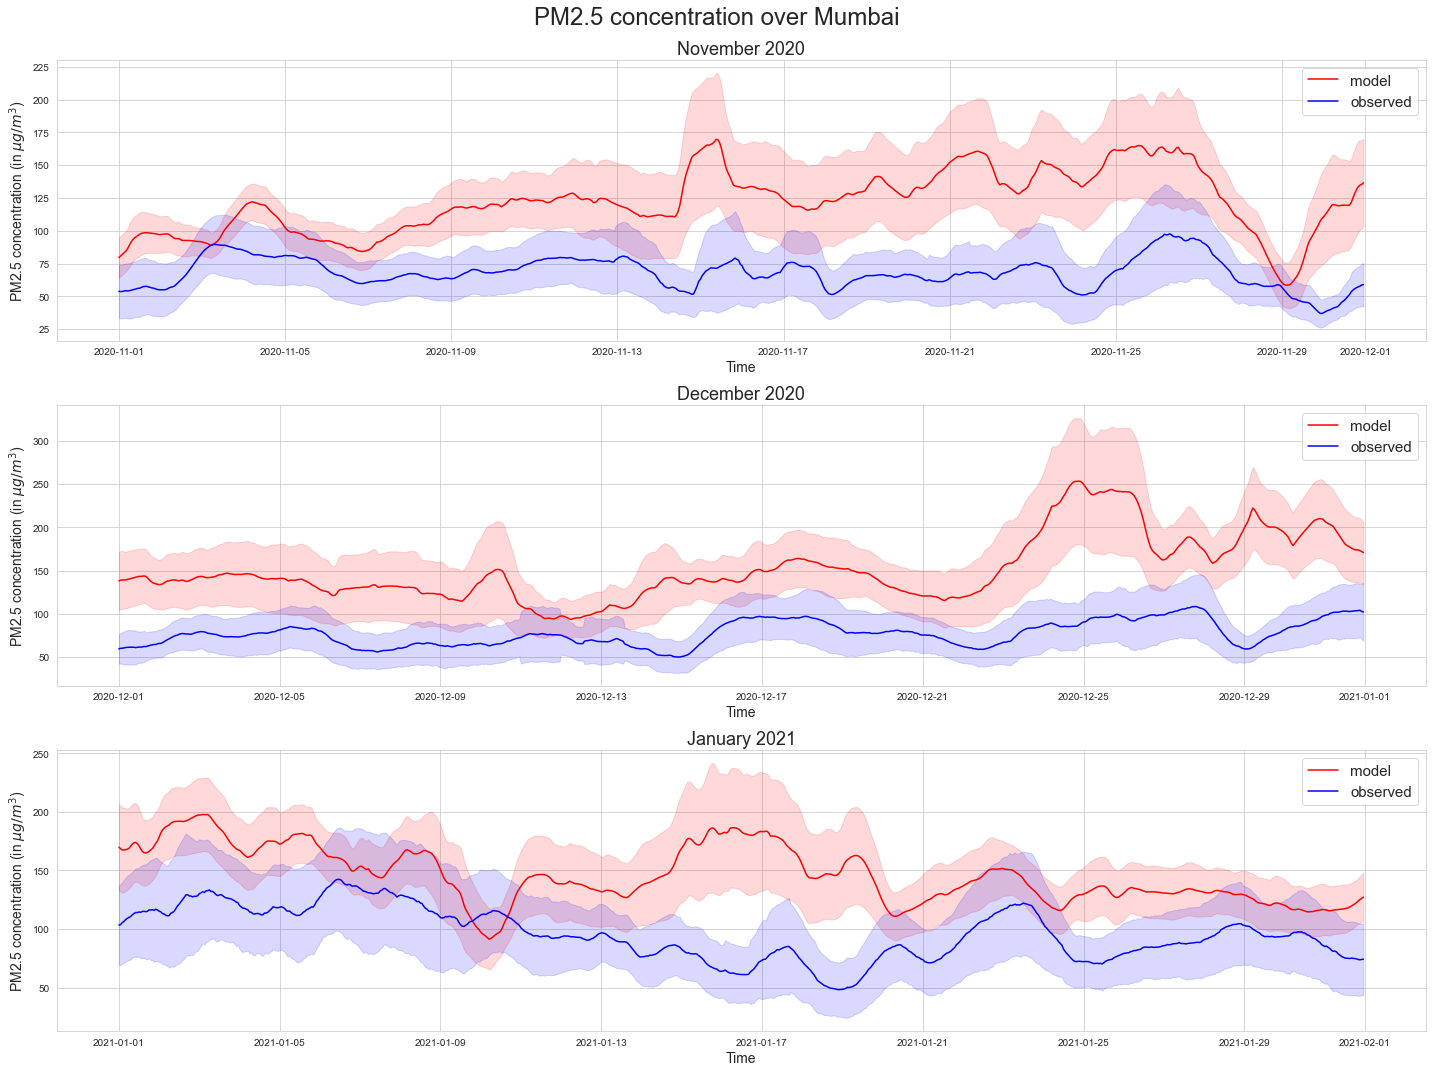

In [69]:
# Plot of PM2.5 model and data for Nov, Dec and Jan with errorbars

fig = plt.figure(figsize=(20,15))
plt.subplot(311)
sns.lineplot(data = dfnov, x='datetime', y='mod_pm2', err_style='band', label='model', color='red')
# plt.errorbar(dfmod_nov.index, dfmod_nov['mod_pm2'], yerr=dfmod_nov['mod_pm2_stdev'], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfnov.index, dfnov['mod_pm2'] + dfnov['mod_pm2_stdev'], dfnov['mod_pm2'] - dfnov['mod_pm2_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfnov, x='datetime', y='obs_pm2', err_style='band', label='observed', color='blue')
# plt.errorbar(dfobs_nov.index, dfobs_nov['obs_pm2'], yerr=dfobs_nov['obs_pm2_stdev'], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfnov.index, dfnov['obs_pm2'] + dfnov['obs_pm2_stdev'], dfnov['obs_pm2'] - dfnov['obs_pm2_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM2.5 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('November 2020', fontsize=18)

plt.subplot(312)
sns.lineplot(data = dfdec, x='datetime', y='mod_pm2', err_style='band', label='model', color='red')
# plt.errorbar(dfdec.index, dfdec['mod_pm2'], yerr=dfdec['mod_pm2_stdev'], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfdec.index, dfdec['mod_pm2'] + dfdec['mod_pm2_stdev'], dfdec['mod_pm2'] - dfdec['mod_pm2_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfdec, x='datetime', y='obs_pm2', err_style='band', label='observed', color='blue')
# plt.errorbar(dfdec.index, dfdec['obs_pm2'], yerr=dfdec['obs_pm2_stdev'], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfdec.index, dfdec['obs_pm2'] + dfdec['obs_pm2_stdev'], dfdec['obs_pm2'] - dfdec['obs_pm2_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM2.5 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('December 2020', fontsize=18)

plt.subplot(313)
sns.lineplot(data = dfjan, x='datetime', y='mod_pm2', err_style='band', label='model', color='red')
# plt.errorbar(dfjan.index, dfjan['mod_pm2'], yerr=dfjan['mod_pm2_stdev'], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfjan.index, dfjan['mod_pm2'] + dfjan['mod_pm2_stdev'], dfjan['mod_pm2'] - dfjan['mod_pm2_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfjan, x='datetime', y='obs_pm2', err_style='band', label='observed', color='blue')
# plt.errorbar(dfjan.index, dfjan['obs_pm2'], yerr=dfjan['obs_pm2_stdev'], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfjan.index, dfjan['obs_pm2'] + dfjan['obs_pm2_stdev'], dfjan['obs_pm2'] - dfjan['obs_pm2_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM2.5 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('January 2021', fontsize=18)

fig.suptitle('PM2.5 concentration over Mumbai', fontsize=24, y=0.99)
fig.tight_layout()
plt.savefig('./images/pm25ts_err_running.png')

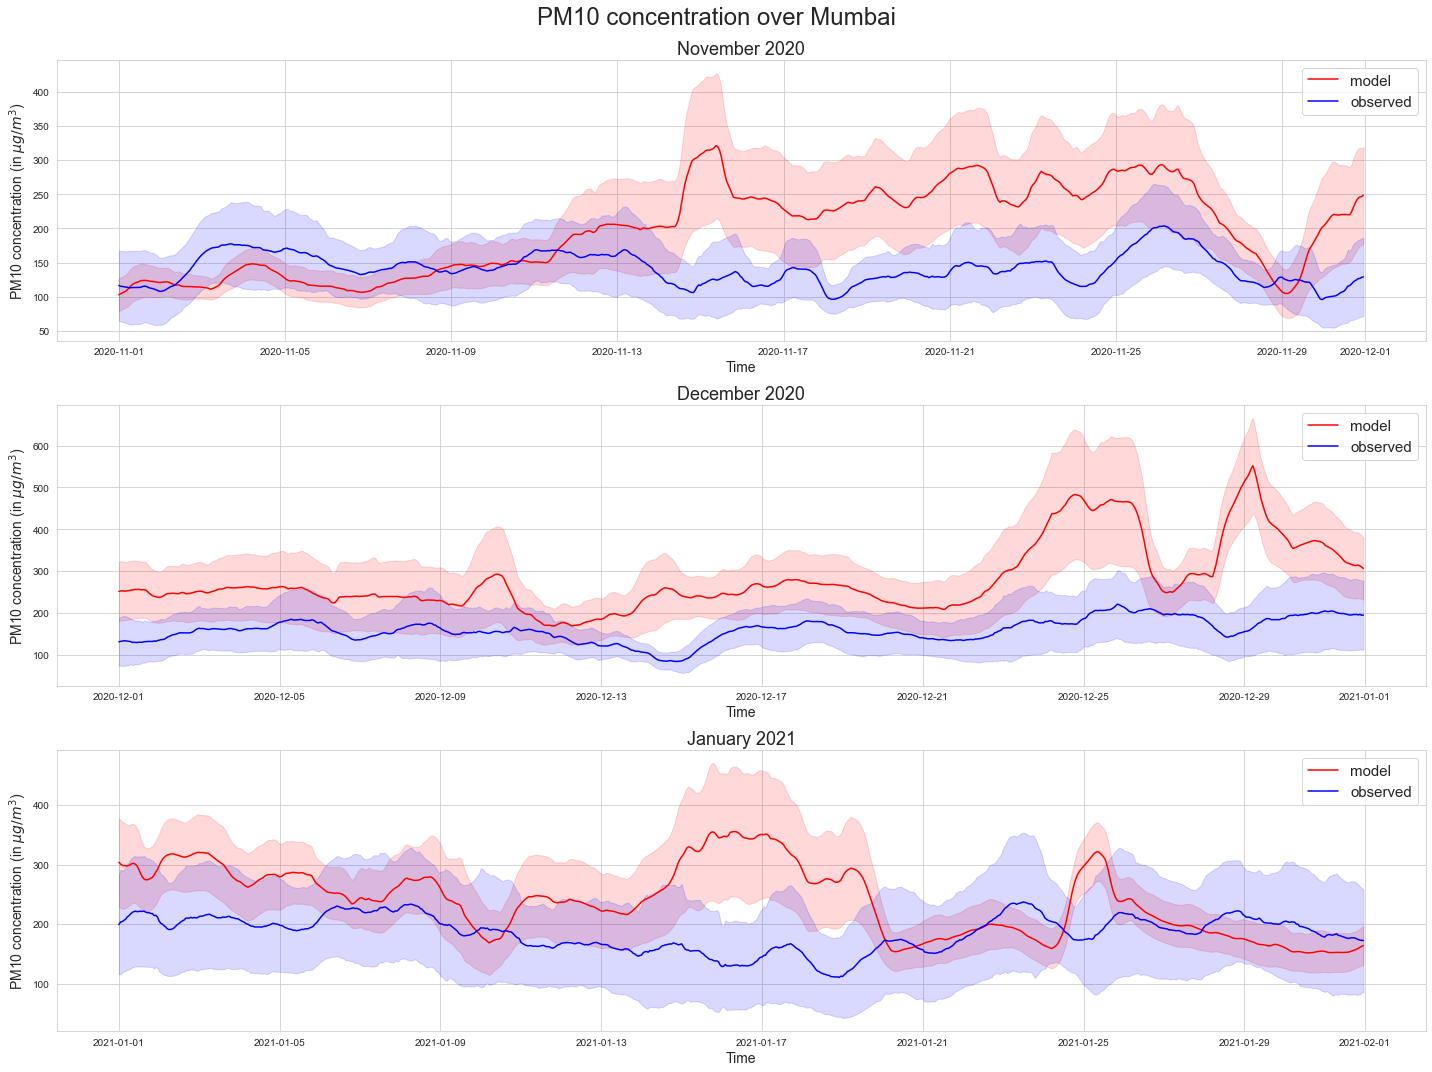

In [70]:
# Plot of PM10 model and data for Nov, Dec and Jan with errorbars

fig = plt.figure(figsize=(20,15))
plt.subplot(311)
sns.lineplot(data = dfnov, x='datetime', y='mod_pm10', err_style='band', label='model', color='red')
# plt.errorbar(dfnov.index, dfnov['mod_pm10'], yerr=dfnov['mod_pm10_stdev'], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfnov.index, dfnov['mod_pm10'] + dfnov['mod_pm10_stdev'], dfnov['mod_pm10'] - dfnov['mod_pm10_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfnov, x='datetime', y='obs_pm10', err_style='band', label='observed', color='blue')
# plt.errorbar(dfnov.index, dfnov['obs_pm10'], yerr=dfnov['obs_pm10_stdev'], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfnov.index, dfnov['obs_pm10'] + dfnov['obs_pm10_stdev'], dfnov['obs_pm10'] - dfnov['obs_pm10_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM10 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('November 2020', fontsize=18)

plt.subplot(312)
sns.lineplot(data = dfdec, x='datetime', y='mod_pm10', err_style='band', label='model', color='red')
# plt.errorbar(dfnov.index, dfnov['mod_pm10'], yerr=dfnov['mod_pm10_stdev'], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfdec.index, dfdec['mod_pm10'] + dfdec['mod_pm10_stdev'], dfdec['mod_pm10'] - dfdec['mod_pm10_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfdec, x='datetime', y='obs_pm10', err_style='band', label='observed', color='blue')
# plt.errorbar(dfnov.index, dfnov['obs_pm10'], yerr=dfnov['obs_pm10_stdev'], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfdec.index, dfdec['obs_pm10'] + dfdec['obs_pm10_stdev'], dfdec['obs_pm10'] - dfdec['obs_pm10_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM10 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('December 2020', fontsize=18)

plt.subplot(313)
sns.lineplot(data = dfjan, x='datetime', y='mod_pm10', err_style='band', label='model', color='red')
# plt.errorbar(dfnov.index, dfnov['mod_pm10'], yerr=dfnov['mod_pm10_stdev'], alpha=0.15, ecolor='blue', fmt='o', mfc='blue', markersize=8, capsize=10)
plt.fill_between(dfjan.index, dfjan['mod_pm10'] + dfjan['mod_pm10_stdev'], dfjan['mod_pm10'] - dfjan['mod_pm10_stdev'], alpha=0.15, color='red')
sns.lineplot(data = dfjan, x='datetime', y='obs_pm10', err_style='band', label='observed', color='blue')
# plt.errorbar(dfnov.index, dfnov['obs_pm10'], yerr=dfnov['obs_pm10_stdev'], alpha=0.15, ecolor='green', fmt='o', mfc='green', markersize=8, capsize=10)
plt.fill_between(dfjan.index, dfjan['obs_pm10'] + dfjan['obs_pm10_stdev'], dfjan['obs_pm10'] - dfjan['obs_pm10_stdev'], alpha=0.15, color='blue')
plt.ylabel('PM10 concentration (in $\mu g/m^3$)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('January 2021', fontsize=18)

fig.suptitle('PM10 concentration over Mumbai', fontsize=24, y=0.99)
fig.tight_layout()
plt.savefig('./images/pm10ts_err_running.png')

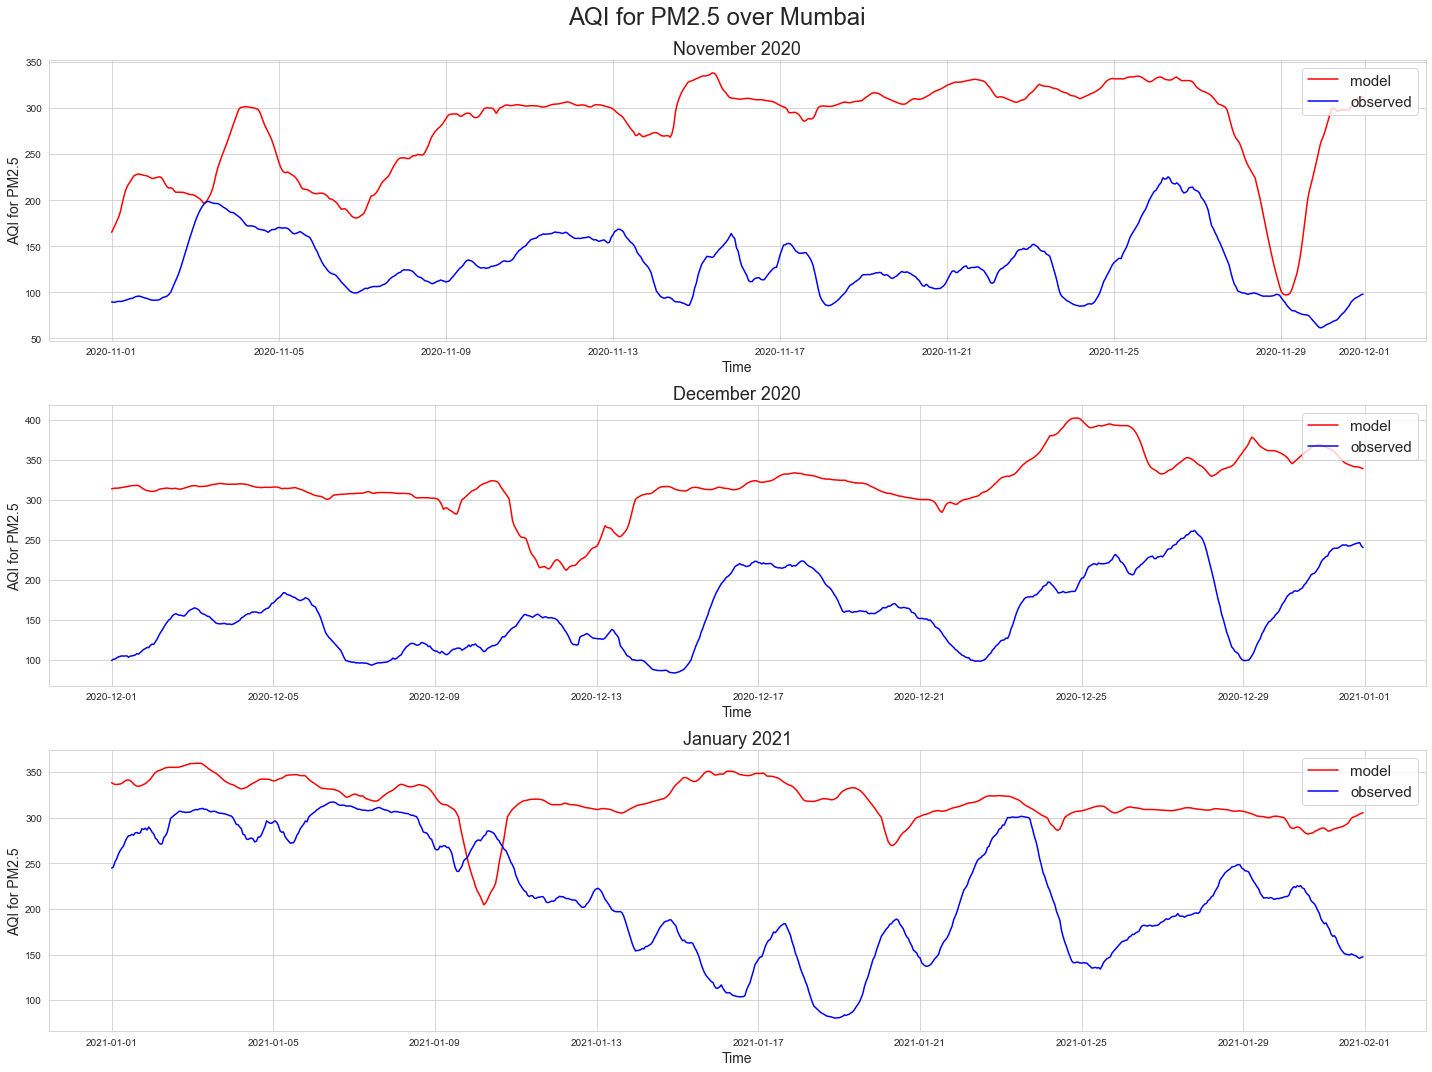

In [71]:
# Plot of AQI_PM2.5 model and data Time series for Nov, Dec and Jan

fig = plt.figure(figsize=(20,15))
plt.subplot(311)
sns.lineplot(data = dfnov, x='datetime', y='mod_aqi_pm2', err_style='band', label='model', color='red')
sns.lineplot(data = dfnov, x='datetime', y='obs_aqi_pm2', err_style='band', label='observed', color='blue')
plt.ylabel('AQI for PM2.5', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('November 2020', fontsize=18)

plt.subplot(312)
sns.lineplot(data = dfdec, x='datetime', y='mod_aqi_pm2', err_style='band', label='model', color='red')
sns.lineplot(data = dfdec, x='datetime', y='obs_aqi_pm2', err_style='band', label='observed', color='blue')
plt.ylabel('AQI for PM2.5', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('December 2020', fontsize=18)

plt.subplot(313)
sns.lineplot(data = dfjan, x='datetime', y='mod_aqi_pm2', err_style='band', label='model', color='red')
sns.lineplot(data = dfjan, x='datetime', y='obs_aqi_pm2', err_style='band', label='observed', color='blue')
plt.ylabel('AQI for PM2.5', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('January 2021', fontsize=18)

fig.suptitle('AQI for PM2.5 over Mumbai', fontsize=24, y=0.99)
fig.tight_layout()
plt.savefig('./images/aqi_pm25_ts.png')

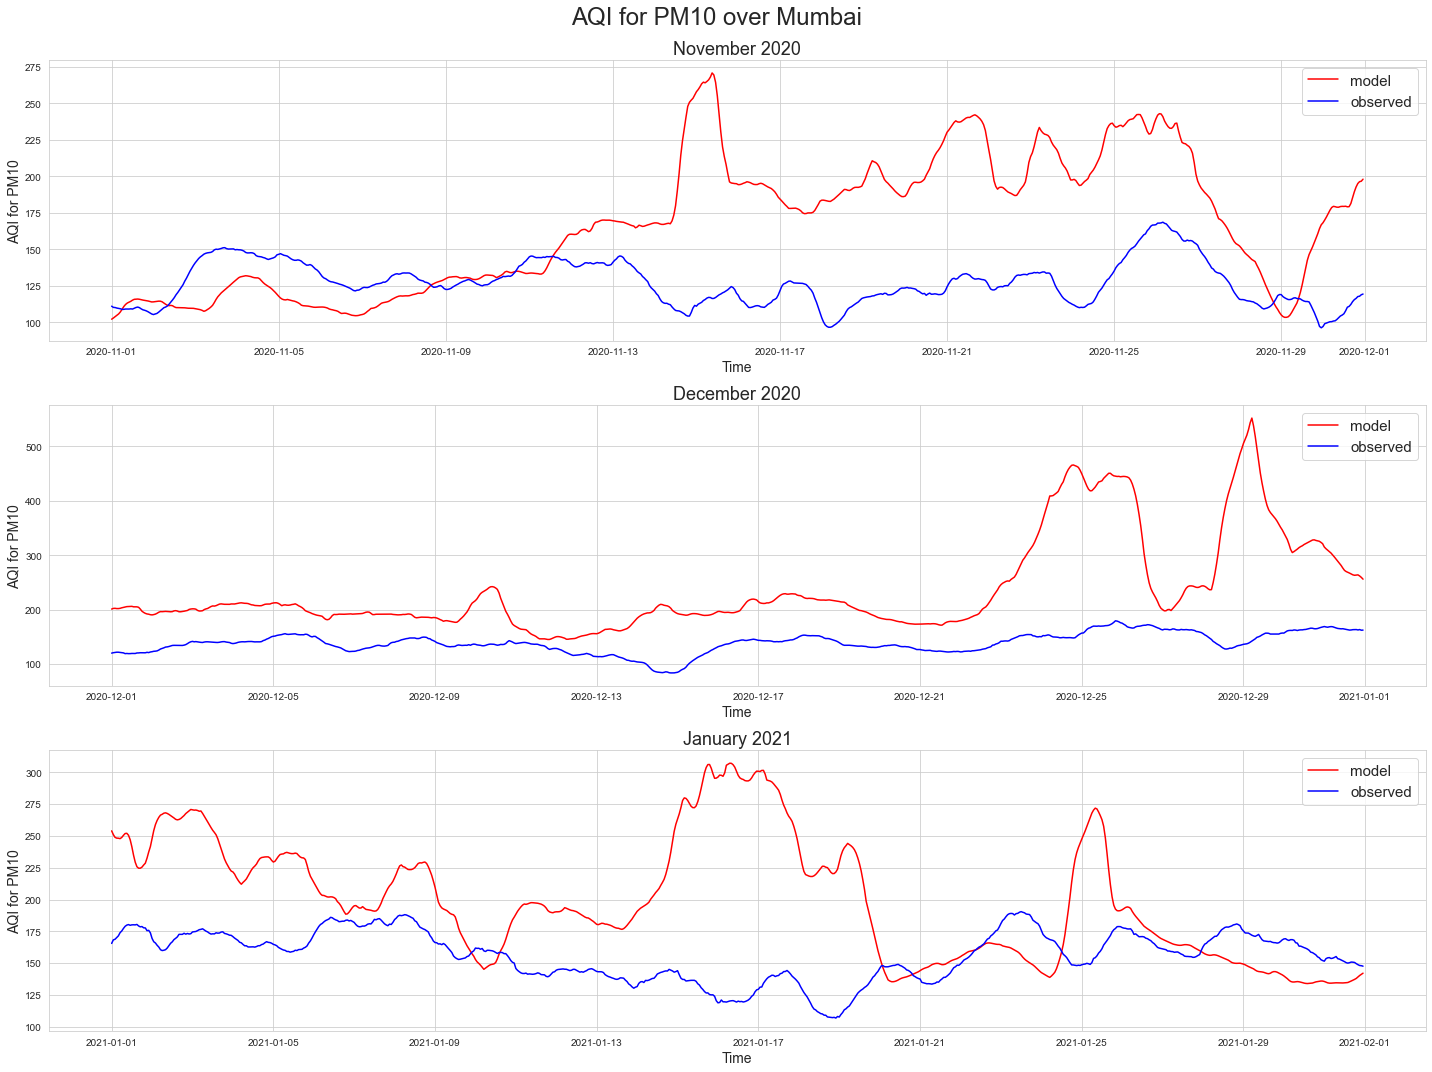

In [72]:
# Plot of AQI_PM10 model and data Time series for Nov, Dec and Jan

fig = plt.figure(figsize=(20,15))
plt.subplot(311)
sns.lineplot(data = dfnov, x='datetime', y='mod_aqi_pm10', err_style='band', label='model', color='red')
sns.lineplot(data = dfnov, x='datetime', y='obs_aqi_pm10', err_style='band', label='observed', color='blue')
plt.ylabel('AQI for PM10', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('November 2020', fontsize=18)

plt.subplot(312)
sns.lineplot(data = dfdec, x='datetime', y='mod_aqi_pm10', err_style='band', label='model', color='red')
sns.lineplot(data = dfdec, x='datetime', y='obs_aqi_pm10', err_style='band', label='observed', color='blue')
plt.ylabel('AQI for PM10', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('December 2020', fontsize=18)

plt.subplot(313)
sns.lineplot(data = dfjan, x='datetime', y='mod_aqi_pm10', err_style='band', label='model', color='red')
sns.lineplot(data = dfjan, x='datetime', y='obs_aqi_pm10', err_style='band', label='observed', color='blue')
plt.ylabel('AQI for PM10', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc=1, prop={'size': 15})
plt.title('January 2021', fontsize=18)

fig.suptitle('AQI for PM10 over Mumbai', fontsize=24, y=0.99)
fig.tight_layout()
plt.savefig('./images/aqi_pm10_ts.png')